In [203]:
import pandas as pd
import numpy as np
df=pd.read_csv("perch3.csv")

In [204]:
feature = df[df.columns[1:]]
target=df[df.columns[0]]

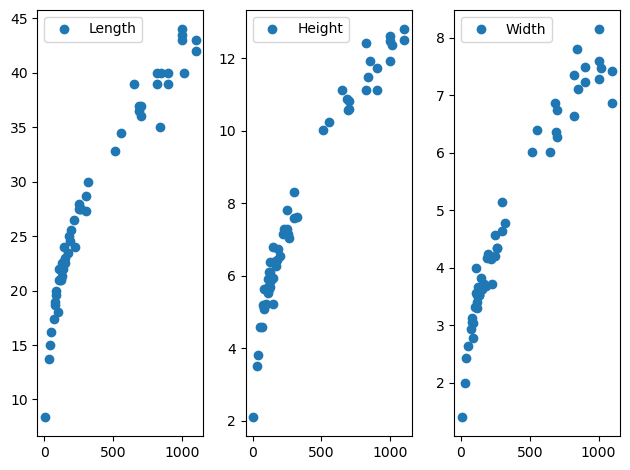

In [205]:
# 데이터 분포 확인 => 선형은 아니지만 곡선의 형태를 띄고 있다! 
import matplotlib.pyplot as plt

for i in range(1,4,1) :
    plt.subplot(1,3,i)
    plt.plot(target, feature[df.columns[i]],'o', label=f'{df.columns[i]}')
    plt.legend()
plt.tight_layout()
plt.show()


In [206]:
# 특성 추가 
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5, include_bias=False)
feature=pd.DataFrame(poly.fit_transform(feature))#, columns=poly.get_feature_names_out())

In [207]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature,target,random_state=5)

In [208]:
from sklearn.preprocessing import StandardScaler # 정규화(스케일링)
scaler=StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [209]:
# 회귀학습 

In [210]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [211]:
lr_model.score(x_test,y_test),lr_model.score(x_train,y_train)

(-38.76786723301736, 1.0)

In [212]:
# 규제 : 가중치 값을 조절해서 과대적합 문제 해결
# Ridge : 모든 피쳐에 가중치를 0에 가깝게 조절
# Lasso : 특정 피쳐의 가중치를 0으로 해서 차원축소의 의미부여 
from sklearn.linear_model import Ridge


In [213]:
alphas=[0,0.1,1,10,20,30]
ridge_score=[[],[]]
for i in alphas:
    ridge_model=Ridge(alpha=i)
    ridge_model.fit(x_train,y_train)
    ridge_score[0].append(ridge_model.score(x_test,y_test))
    ridge_score[1].append(ridge_model.score(x_train,y_train))

c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [214]:
best_alpha=alphas[ridge_score[0].index(max(ridge_score[0]))] # alpha=1일 때, 테스트 스코어가 제일 높음
print(f"테스트 성적이 제일 높을 때의 Alpha값 : {best_alpha}")

테스트 성적이 제일 높을 때의 Alpha값 : 1


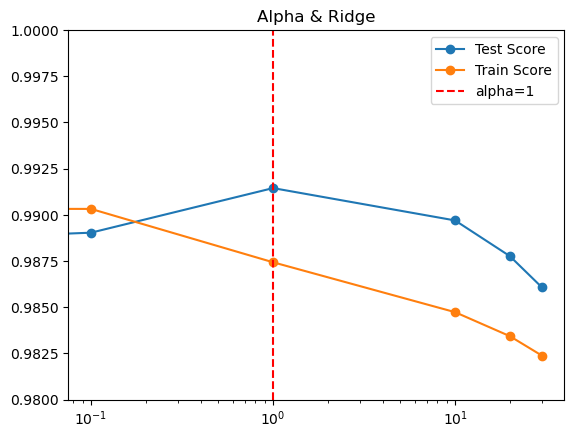

In [215]:
plt.plot(alphas,ridge_score[0],label='Test Score', marker="o")
plt.plot(alphas,ridge_score[1],label='Train Score', marker="o")
plt.ylim(0.98,1)
plt.axvline(best_alpha, linestyle='--', color='r',label=f'alpha={best_alpha}')
plt.legend()
plt.xscale('log')
plt.title('Alpha & Ridge')
plt.show()

In [216]:
ridge_model.coef_

array([11.58560914, 11.16871618, 10.39672634, 10.43553996, 10.30812209,
        9.39595309, 10.1819614 ,  9.31995247,  8.55296559,  8.79731612,
        8.80333147,  7.73056483,  8.82007477,  7.77411194,  6.85695994,
        8.84194644,  7.8302827 ,  6.95449212,  6.24012537,  6.99048022,
        7.09000787,  5.85098435,  7.20258957,  5.97647316,  4.89330485,
        7.32240759,  6.11792627,  5.06171886,  4.18089483,  7.44369106,
        6.26958109,  5.24897376,  4.4085729 ,  3.76301887,  5.16108446,
        5.33263331,  3.9322057 ,  5.51815866,  4.11856325,  2.86998652,
        5.71270869,  4.32284579,  3.08804369,  2.03691794,  5.91116405,
        4.54039926,  3.32875596,  2.30556236,  1.48873436,  6.1083241 ,
        4.7662634 ,  3.5874804 ,  2.6016167 ,  1.82638393,  1.26751988])

In [217]:
from sklearn.linear_model import Lasso

alphas=[0,0.1,1,10,20,30]
lasso_score=[[],[]]
for i in alphas:
    lasso_model=Lasso(alpha=i, max_iter=100000)
    lasso_model.fit(x_train,y_train)
    lasso_score[0].append(lasso_model.score(x_test,y_test))
    lasso_score[1].append(lasso_model.score(x_train,y_train))


c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.111e+03, tolerance: 4.884e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV in

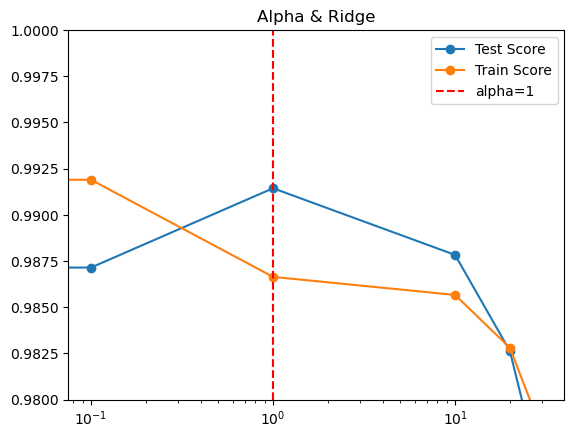

In [218]:
plt.plot(alphas,lasso_score[0],label='Test Score', marker="o")
plt.plot(alphas,lasso_score[1],label='Train Score', marker="o")
plt.ylim(0.98,1)
plt.axvline(best_alpha, linestyle='--', color='r',label=f'alpha={best_alpha}')
plt.legend()
plt.xscale('log')
plt.title('Alpha & Ridge')
plt.show()

In [219]:
ridge_model.coef_

array([11.58560914, 11.16871618, 10.39672634, 10.43553996, 10.30812209,
        9.39595309, 10.1819614 ,  9.31995247,  8.55296559,  8.79731612,
        8.80333147,  7.73056483,  8.82007477,  7.77411194,  6.85695994,
        8.84194644,  7.8302827 ,  6.95449212,  6.24012537,  6.99048022,
        7.09000787,  5.85098435,  7.20258957,  5.97647316,  4.89330485,
        7.32240759,  6.11792627,  5.06171886,  4.18089483,  7.44369106,
        6.26958109,  5.24897376,  4.4085729 ,  3.76301887,  5.16108446,
        5.33263331,  3.9322057 ,  5.51815866,  4.11856325,  2.86998652,
        5.71270869,  4.32284579,  3.08804369,  2.03691794,  5.91116405,
        4.54039926,  3.32875596,  2.30556236,  1.48873436,  6.1083241 ,
        4.7662634 ,  3.5874804 ,  2.6016167 ,  1.82638393,  1.26751988])